![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/68886973-eca24380-06f6-11ea-8327-3e9a22e22b43.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# Health and Obesity trends

Let's put in practice the topics covered in the course and analyze health and obesity trends.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import requests

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the dump of `USDA Food Composition Database` into a `food_df` DataFrame variable.

The National Nutrient Database (NNDB) is provided by the [USDA](https://ndb.nal.usda.gov/ndb/) to allow the public to get standardized information on foods. They document the database and all supporting information on the USDA website.

> Although the file format says "txt", we call these plain CSVs files and read it using `read_csv` method. Be aware of parsing correctly `NaN` values, data separator, encoding, quotechar and any other parsing option you think necessary.

Here's a preview of that file:

In [2]:
!head data/FOOD_DES.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


The column names are taken from the original documentation for this dataset.

> Use the given column names while reading the data.

In [3]:
column_names = ['NDB_No', 'FdGrp_Cd', 'Long_Desc', 'Shrt_Desc', 'ComName',
                'ManufacName', 'Survey', 'Ref_desc', 'Refuse', 'SciName',
                'N_Factor', 'Pro_Factor', 'Fat_Factor', 'CHO_Factor']

In [8]:
# your code goes here
df = pd.read_csv('data/FOOD_DES.txt', names=column_names, sep='^', header=None, quotechar='~', encoding='iso-8859-1')
df.head()


,NDB_No,FdGrp_Cd,Long_Desc,Shrt_Desc,ComName,ManufacName,Survey,Ref_desc,Refuse,SciName,N_Factor,Pro_Factor,Fat_Factor,CHO_Factor
0,1001,100,"Butter, salted","BUTTER,WITH SALT",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
1,1002,100,"Butter, whipped, with salt","BUTTER,WHIPPED,W/ SALT",NaN,NaN,Y,NaN,0.0,NaN,6.38,NaN,NaN,NaN
2,1003,100,"Butter oil, anhydrous","BUTTER OIL,ANHYDROUS",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
3,1004,100,"Cheese, blue","CHEESE,BLUE",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
4,1005,100,"Cheese, brick","CHEESE,BRICK",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87


How many products do we have?

In [9]:
# your code goes here
df.shape[0]

2429

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Variables distribution

Analyze how values are distributed:

- Create an histogram of `Refuse` variable.
- Create a boxplot of `N_Factor` variable.

array([[<AxesSubplot:title={'center':'Refuse'}>]], dtype=object)

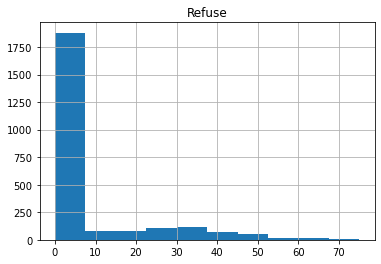

In [12]:
# your code goes here
df.hist(column='Refuse')

<AxesSubplot:>

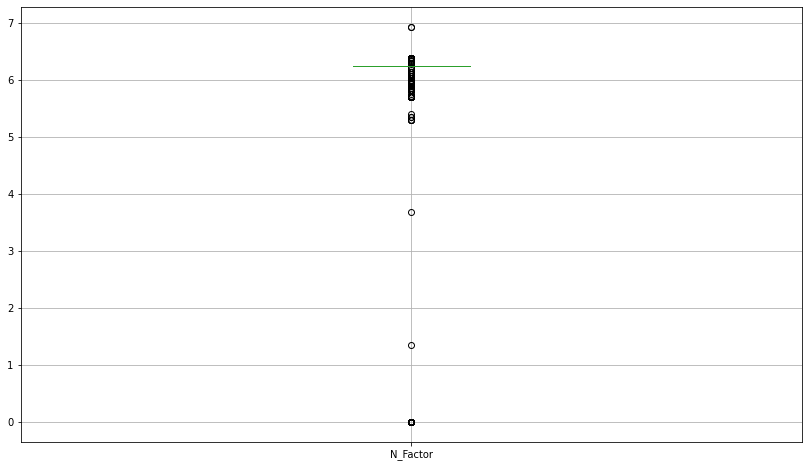

In [18]:
# your code goes here
df.boxplot(column='N_Factor', figsize=(14,8))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which are the top-10 food manufacturers with more products on `food_df`.

In [22]:
# your code goes here
x = df['ManufacName'].value_counts().head(10)
x

The Quaker Oats, Co.    71
MEAD JOHNSON            40
MOM Brands              31
ABBOT NUTRTION          26
Post Foods, LLC         21
Kraft Foods, Inc.       18
Chobani                 17
B&G Foods, Inc          13
GERBER                  12
Campbell Soup Co.       10
Name: ManufacName, dtype: int64

Also create a bar plot showing that results.

<AxesSubplot:>

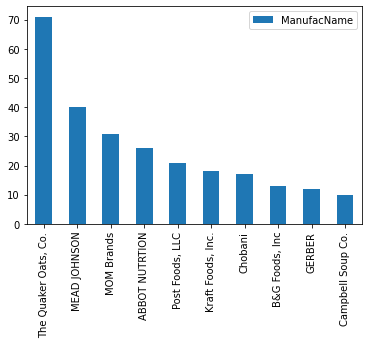

In [26]:
# your code goes here
b = pd.DataFrame(x)
b.plot.bar()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Analyzing Starbucks nutrition facts

Starbucks is an American coffee chain founded in Seattle. It serves both beverages and food.

<img width="650" alt="Starbucks" src="https://user-images.githubusercontent.com/7065401/68891327-57f01380-06ff-11ea-8461-eb35ba0c3bb0.png">

We'll analyze the nutritional information for Starbucks’ drink menu items using this [Nutrition facts for Starbucks drinks](https://www.kaggle.com/starbucks/starbucks) data. All nutritional information for drinks are for a 12oz serving size.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Getting Starbucks' drinks information

- Create an sqlite3 connection to the `starbucks.db` SQLite3 database.
- Read from the `drinks` table just the items with more than 100 calories and save them to a `drinks_df` DataFrame variable.

In [49]:
# your code goes here
conn = sqlite3.connect('data/starbucks.db')
cur = conn.cursor()
cur.execute("SELECT * FROM drinks WHERE Calories > 100")

data = {'Drink_Name': [], 'Calories': [], 'Fat': [], 'Carbs': [], 'Fiber': [], 'Protein': [], 'Sodium': []}

for row in cur.fetchall():
    data['Drink_Name'].append(row[0])
    data['Calories'].append(row[1])
    data['Fat'].append(row[2])
    data['Carbs'].append(row[3])
    data['Fiber'].append(row[4])
    data['Protein'].append(row[5])
    data['Sodium'].append(row[6])
    
sb = pd.DataFrame(data=data)

conn.close()

In [50]:
sb.head()

,Drink_Name,Calories,Fat,Carbs,Fiber,Protein,Sodium
0,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
1,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0
2,Iced Espresso Classics - Caffe Mocha,140.0,2.5,23.0,0.0,5.0,90.0
3,Iced Espresso Classics - Caramel Macchiato,130.0,2.5,21.0,0.0,5.0,65.0
4,Tazo® Bottled Black Mango,150.0,0.0,38.0,0.0,0.0,15.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which is the item with the highest calories?

In [51]:
# your code goes here
sb.loc[sb['Calories'] == sb['Calories'].max()]

,Drink_Name,Calories,Fat,Carbs,Fiber,Protein,Sodium
31,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create two groups of items: "`less or equal 150 calories`" and "`more 150 calories`"

In [54]:
# your code goes here

less_equal_150_cal = sb.loc[sb['Calories'] <= 150]
less_equal_150_cal.head()

,Drink_Name,Calories,Fat,Carbs,Fiber,Protein,Sodium
0,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
1,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0
2,Iced Espresso Classics - Caffe Mocha,140.0,2.5,23.0,0.0,5.0,90.0
3,Iced Espresso Classics - Caramel Macchiato,130.0,2.5,21.0,0.0,5.0,65.0
4,Tazo® Bottled Black Mango,150.0,0.0,38.0,0.0,0.0,15.0


In [55]:
# your code goes here

more_150_cal = sb.loc[sb['Calories'] > 150]
more_150_cal.head()

,Drink_Name,Calories,Fat,Carbs,Fiber,Protein,Sodium
17,Starbucks® Doubleshot Protein Dark Chocolate,210.0,2.5,33.0,2.0,20.0,115.0
18,Starbucks® Doubleshot Protein Vanilla,200.0,2.5,34.0,2.0,20.0,120.0
30,Hot Chocolate,320.0,9.0,47.0,4.0,14.0,160.0
31,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0
32,Caffè Latte,190.0,7.0,19.0,0.0,13.0,170.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Compare item characteristics

Create a `compare_groups()` function that compares a given field of both groups of data, `less_equal_150_cal` and `more_150_cal`, by showing two overlapped histograms.

- You should use different colors per histogram. Also add a little bit of opacity (use `alpha=0.4`).
- The function MUST check that the given field exists, and raise `ValueError` with a "Field not found" message otherwise.


In [67]:
# your code goes here
def compare_groups(field):
    if (field in less_equal_150_cal.columns):
        less_equal_150_cal[field].plot(kind='hist', color='blue', alpha=0.4, title=field)
        more_150_cal[field].plot(kind='hist', color='red', alpha=0.4)
    else:
        raise ValueError(f"Field '{field}' not found")

Validate your function showing a comparison of the `Calories` per group.

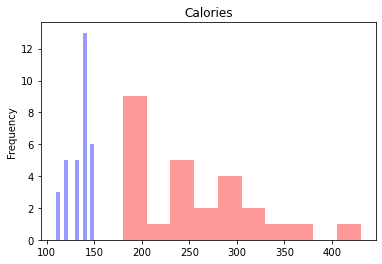

In [68]:
# your code goes here
compare_groups('Calories')

Now answer: **Less Calories implies less Sodium?**

In [69]:
# your code goes here
sb['Calories'].corr(sb['Sodium'], method='pearson')

0.5906283900812388

**Less Calories implies less Carbs?**

In [71]:
# your code goes here
sb.corr(method='pearson')[['Calories', 'Carbs']]

,Calories,Carbs
Calories,1.000000,0.687527
Fat,0.765158,0.120152
Carbs,0.687527,1.000000
Fiber,0.583202,0.497801
Protein,0.727908,0.216244
Sodium,0.590628,0.081824


**Less Calories implies less Proteins?**

In [73]:
# your code goes here
sb.corr(method='pearson')['Calories']

Calories    1.000000
Fat         0.765158
Carbs       0.687527
Fiber       0.583202
Protein     0.727908
Sodium      0.590628
Name: Calories, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Healthy diet interest

In order to measure interest on healthy diets, we'll analyze how many pageviews the article `Healthy diet` received during the last years.

![Food-piramid](https://user-images.githubusercontent.com/7065401/68880286-bf02cd80-06e9-11ea-8d42-ff6dbb539f7d.png)

To get pageviews from Wikipedia, we'll need to use the _Analytics API_. Here you can find [the documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews) to get pageviews from an article.

To get monthly pageviews for a given article, you can use the following endpoint:

```
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{ARTICLE}/monthly/{START}/{END}
```

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get data from Wikipedia using its API

Make a request to Wikipedia API to get monthly page views for `Healthy_diet` article from year 2015 (`2015010100`) to 2019 (`2019100100`).

Store the response in a `pageviews_df` DataFrame variable.

In [82]:
url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Healthy_diet/monthly/2015010100/2019100100"

In [86]:
# your code goes here
page = requests.get(url)
print(page.text)
json = page.json()
pageviews_df = pd.DataFrame.from_dict(data=json['items'])
pageviews_df.head()

<!DOCTYPE html>
<html lang="en">
<meta charset="utf-8">
<title>Wikimedia Error</title>
<style>
* { margin: 0; padding: 0; }
body { background: #fff; font: 15px/1.6 sans-serif; color: #333; }
.content { margin: 7% auto 0; padding: 2em 1em 1em; max-width: 640px; }
.footer { clear: both; margin-top: 14%; border-top: 1px solid #e5e5e5; background: #f9f9f9; padding: 2em 0; font-size: 0.8em; text-align: center; }
img { float: left; margin: 0 2em 2em 0; }
a img { border: 0; }
h1 { margin-top: 1em; font-size: 1.2em; }
.content-text { overflow: hidden; overflow-wrap: break-word; word-wrap: break-word; -webkit-hyphens: auto; -moz-hyphens: auto; -ms-hyphens: auto; hyphens: auto; }
p { margin: 0.7em 0 1em 0; }
a { color: #0645ad; text-decoration: none; }
a:hover { text-decoration: underline; }
code { font-family: sans-serif; }
.text-muted { color: #777; }
</style>
<div class="content" role="main">
<a href="https://www.wikimedia.org"><img src="https://www.wikimedia.org/static/images/wmf-logo.png" s

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### When was the highest search peak?

Save in a `max_pageviews_str` variable the date where `Healthy_diet` article had the highest volume of page views.

Also save a `max_pageview_date` with that previous value parsed to `datetime`.

In [ ]:
# your code goes here

max_pageviews_df = pageviews_df.loc[pageviews_df['views'] == pageviews_df['views'].max()]

max_pageviews_str = max_pageviews_df['timestamp'].values[0]
print(max_pageviews_str)

max_pageviews_date = pd.to_datetime(max_pageviews_str, format='%Y%m%d%H')
print(max_pageviews_date)

We can draw a quick plot showing the evolution of `views` per month:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(pageviews_df['timestamp'], pageviews_df['views'])

plt.axvline(x=max_pageviews_str, color='green')

plt.xticks(rotation=90)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get more data from Wikipedia API

Create a `get_pageviews_count()` function that receives a variable number **article names** as argument, and returns a dictionary with the sum of pageviews during 2018 for each of these article names.

- The function MUST check that at least one parameter is found, and raise a `ValueError` otherwise.

```
https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{ARTICLE}/monthly/2018010100/2018123100
```

In [ ]:
# your code goes here

def get_pageviews_count(*args):
    if (not len(args)):
        raise ValueError('No article names found')
    
    dict = {}
        
    for article_name in args:
        url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{article_name}/monthly/2018010100/2018123100'

        resp = requests.get(url)

        dict_json = resp.json()

        article_df = pd.DataFrame.from_dict(dict_json['items'])
        
        dict[article_name] = article_df['views'].sum()
    
    return dict

Calling `get_pageviews_count('Healthy_diet', 'Food', 'Obesity')` should return something like:

```
{'Healthy_diet': 478712, 'Food': 1125874, 'Obesity': 1092577}
```

In [ ]:
get_pageviews_count('Healthy_diet', 'Food', 'Obesity')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Obesity trends in the USA

Obesity in the United States is a major health issue, resulting in numerous diseases, specifically increased risk of certain types of cancer, coronary artery disease, type 2 diabetes, stroke, as well as significant increases in early mortality and economic costs.

Let's analyze obesity trends on each state of the USA. To do that take a look at the _Obesity in the United States_ Wikipedia article where they analyze obesity revalence by state and territory.

<img width="500" alt="Obesity-trends" src="https://user-images.githubusercontent.com/7065401/68873389-5a8e4100-06de-11ea-844c-5ec622af5caa.png">

In [ ]:
url = 'https://en.wikipedia.org/wiki/Obesity_in_the_United_States'

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the HTML table at the end of the article into a `obesity_df` DataFrame object.

> Be aware of parsing correctly `NaN` values that appear as `—` characters.

<img width="450" alt="Obesity-table" src="https://user-images.githubusercontent.com/7065401/68880373-e5286d80-06e9-11ea-9bd0-f59ffcf02341.png">

In [ ]:
# your code goes here

dfs = pd.read_html(url, na_values='—')

obesity_df = dfs[0]

obesity_df.head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Sort the states by _Obesity rank_ and get the 5 states at the top. Show name and obesity rank.

In [ ]:
# your code goes here
top_5_obesity = obesity_df.sort_values('Obesity rank').iloc[:5, [0, 5]]

top_5_obesity


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)